In [1]:
import pandas as pd
import matplotlib.pyplot as plt

QTM 151 final project: Impact of the FIA Formula One 2022 Technical Regulation Changes

Group Member Names: Mori Schacter, Ethan Sun, Lina Li, Cindy Wang

Formula One is the most prestigious racing category of all motorsports. Also known as F1, the championship puts on the fastest road racing cars, carrying the most history, the best drivers, and the most attention from media and celebrities around the world. The sport consists of currently 10 teams and 20 drivers that compete in 20 countries across 5 continents in a single season. The championship accumulated 1.54 billion viewers in the 2022 season, with an average of 70 million viewers per race. Regulated by the FIA, or the Fédération Internationale de l'Automobile, F1 is owned under Liberty Media with a publicly tradeable stock(FWONK). F1 consists of open-wheel single-seater formula cars with a high emphasis on aerodynamic downforce to allow for their fast cornering speed.

Traveling in fluids leaves turbulence that follows the moving object, picture a person swimming in the water, they leave a turbulent flow of water behind their feet. A similar effect takes place with F1 race cars and the air they travel in, the turbulence they leave behind is known as "dirty air". The problem with "dirty air" is that F1 cars generate significant downforce using the relative velocity in the flow of air around the chassis. Downforce is where airflow surrounding the car is manipulated using aerodynamic principles to push the tires of the car into the track--picture the aerodynamic effect of an airplane's wing, but reversed in generating downward force instead of lift. Forces that push the race car's tires into the ground result in increased grip of the car's tires, allowing for higher cornering speed around the track. The aforementioned "dirty air" is problematic since air turbulence generated by an F1 car driving in front interferes with the downforce generation of the car behind, resulting in less downforce and lower cornering speed. To put simply, the aerodynamic design of F1 cars would slow down cars following one another, resulting in less entertaining races with fewer wheel-to-wheel racing encounters for overtakes and defenses.

To deal with such issue, the FIA in 2022 implemented a set of technical regulation changes, which every team has to abide by, that shifts the aerodynamic principles of F1 car designs with the sole purpose of reducing "dirty air" in order to make Formula One races more entertaining. However, the technical changes reduced aerodynamic downforce for F1 cars across the board. Combined with narrower tires that generate less grip, technical regulations set by the FIA produced slower F1 cars in 2022 compared to the cars in 2021. This project sets out to investigate which F1 team was able to best adjust to the technical changes. In other words, which team was least hindered by the change in regulations with the least setbacks from their 2021 lap time to their 2022 lap time? We chose Q1 qualifying lap times across identical races between the two seasons with complete sets of lap times to compare performance on the basis of teams. We calculated the mean difference in lap time across our selected data and concluded that team Haas was hindered least by regulation changes, and Williams saw the most impact.

In [2]:
tracks=pd.read_csv("Formula1-DatasetFull/raw_data/races.csv")
qual=pd.read_csv("Formula1-DatasetFull/raw_data/qualifying.csv")
teams=pd.read_csv("Formula1-DatasetFull/raw_data/constructors.csv")

Dataset Description: We utilize three dataset tables for this project: "races.csv","qualifying.csv", and "constructors.csv". Races provides information on the race names occured on designated raceId and circuitId, with circuitId representing the specific track. This dataset also provides us with the date when the race occured, and the starting time of the race. Our second dataset, qualifying, maps the q1, q2, and q3 qualifying lap times to driverIds that would represent specific drivers. The dataset also contains raceId to indicate the race in which the qualifying session took place, as well as the number, constructorId to indicate the affiliated team, and eventual positions for each participating driver. Finally, the constructors dataset provides the name and nationality of teams and maps them to a designated constructorId. 


Merging: We need the year of the qualifying races, name of the qualifying races, and the team name to be in the same dataset, so we first merge the "races" and "qualifying" dataset together on their common column "raceId" to obtain new dataset "merge1", then merge "merge1" with "constructors" dataset on their common column "construtorId" to obtain new dataset "merge2". To avoid confusion with the repeating column "name", we rename them to be "Race name" and "Team name".

In [3]:
# We merge the tracks and qual dataset together 
merge1=qual.merge(tracks[["raceId","year","name"]],left_on="raceId",right_on="raceId")

In [4]:
merge2=merge1.merge(teams[["name","constructorId"]],left_on="constructorId",right_on="constructorId")

In [5]:
merge2=merge2.rename(columns={"name_x":"Race name","name_y":"team_name"})

<font size = "3">
Data Cleaning: After datasets are merged, we filter out only the information that we need. First we pick the column team name, race name, time to complete q1, and the year of the qualifying race in "merge2" dataset and select only races that happened in 2021 and 2022. Note that "São Paulo Grand Prix" and "Brazilian Grand Prix" are in fact the same race, so we rename the former as "Brazilian Grand Prix". We also notice that since there are 20 drivers in a single race. "Race name" with no missing values should appear 40 times in 2 years (2*20), but due to special circumstances, a couple of races happens less than 40 times, so we discard those races. Then we also discard the races that have missing q1 values. In the last step, we convert q1 lap times, which are objects, to "seconds", which are numeric in order to do subtraction.

In [6]:
merge2=merge2[["team_name","Race name","q1","year"]]

In [7]:
good_years=merge2[merge2["year"].isin([2021,2022])]

In [8]:
good_years.loc[good_years["Race name"]=="São Paulo Grand Prix","Race name"]="Brazilian Grand Prix"

In [9]:
numtimes=sum(good_years["Race name"].value_counts()==40)
index=(good_years["Race name"].value_counts().index[:16])
good_years_filtered=good_years[good_years["Race name"].isin(index)]

In [10]:
missing_data=good_years_filtered[good_years_filtered['q1'].str.contains(r'\\N')]["Race name"].values

In [11]:
final_data=good_years_filtered[~good_years_filtered["Race name"].isin(missing_data)]

In [12]:
final_data["min:sec"]=final_data["q1"].str.split(".").str[0]
final_data

C:\Users\zheng\AppData\Local\Temp\ipykernel_78836\2408053307.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_data["min:sec"]=final_data["q1"].str.split(".").str[0]


,team_name,Race name,q1,year,min:sec
805,McLaren,Bahrain Grand Prix,1:30.795,2021,1:30
806,McLaren,Bahrain Grand Prix,1:30.902,2021,1:30
811,McLaren,Spanish Grand Prix,1:18.264,2021,1:18
812,McLaren,Spanish Grand Prix,1:17.821,2021,1:17
821,McLaren,Austrian Grand Prix,1:04.345,2021,1:04
...,...,...,...,...,...
9570,Aston Martin,Mexico City Grand Prix,1:20.520,2022,1:20
9571,Aston Martin,Brazilian Grand Prix,1:13.597,2022,1:13
9572,Aston Martin,Brazilian Grand Prix,1:14.398,2022,1:14
9573,Aston Martin,Abu Dhabi Grand Prix,1:25.523,2022,1:25


In [13]:
temp=final_data["min:sec"]
final_data["seconds"]=pd.to_numeric(temp.str[0])*60+pd.to_numeric(temp.str[2:])

C:\Users\zheng\AppData\Local\Temp\ipykernel_78836\3275925861.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_data["seconds"]=pd.to_numeric(temp.str[0])*60+pd.to_numeric(temp.str[2:])


A dataset that included the year, the team, the driver, the lap time.



In [14]:
def function(team):
    mean_old=team[team["year"]==2021]["seconds"].mean()
    mean_new=team[team["year"]==2022]["seconds"].mean()
    return mean_new-mean_old

In [15]:
grouped_data=final_data.groupby(["team_name"]).apply(function).reset_index().rename(columns={0:"Time_diff_seconds"}).sort_values(by="Time_diff_seconds")

In [16]:
grouped_data

,team_name,Time_diff_seconds
5,Haas F1 Team,0.454545
4,Ferrari,1.045455
0,Alfa Romeo,1.090909
8,Red Bull,1.181818
2,Alpine F1 Team,1.454545
3,Aston Martin,1.545455
1,AlphaTauri,1.727273
7,Mercedes,1.772727
6,McLaren,1.909091
9,Williams,1.909091



The main column that we are interested in is "Time_diff_seconds", which represents the difference in lap time of each team. From the descriptive statistics table below, we see that the mean change lap time is approximately 1.409 seconds. McLaren and Williams are the most affected, with a maximum increase of 1.909 seconds in lap time. Haas F1 Team is the least affected, with a minimum increase of 0.455 seconds in lap time 

In [21]:
grouped_data.describe()

,Time_diff_seconds
count,10.000000
mean,1.409091
std,0.465524
min,0.454545
25%,1.113636
50%,1.500000
75%,1.761364
max,1.909091


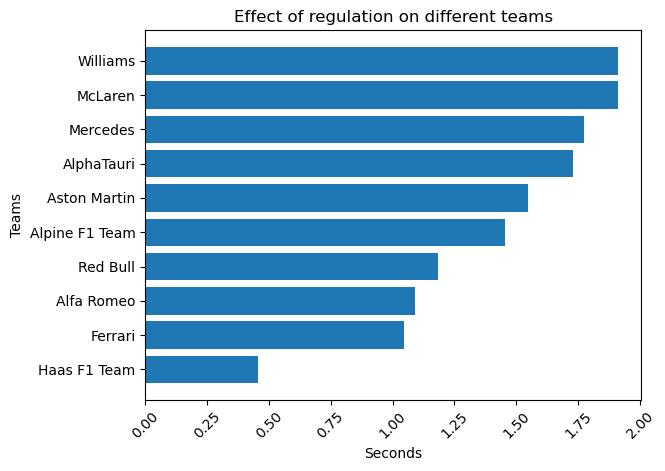

In [22]:

plt.barh(grouped_data["team_name"], grouped_data["Time_diff_seconds"])

plt.ylabel('Teams')
plt.xlabel('Seconds')
plt.xticks(rotation=45) 
plt.title("Effect of regulation on different teams")

plt.show()

Despite Red Bull winning the constructor championship in 2022. The results obtained are interesting in their own ways. Haas F1 team saw the least hindrance in 2022 lap time with an average of 0.45 seconds increase per lap. However, this is mostly because Haas' poor results in the 2021 season left them with significant performance headroom. Haas was last in the 2021 constructor's championship, and committed development resources solely to its 2022 race car starting from the second half of the 2021 season. To put it simply, Haas came on top here not necessarily because it had an unexpectedly fast race car in the 2022 season, but because its 2021 implementation was terrible enough that the gap was easier to fill. Haas did see a modest improvement in constructor placement from 10th to 8th place.

Ferrari saw strong pace throughout the 2022 season and was able to compete with Red Bull for the constructor's championship during the first half of the season. Ferrari saw a recovery from its two-year slump in 2020 and ended in 2nd place for the 2022 constructor's championship. Hence it makes sense to see Ferrari at the front of the charts here, having the second least hindrance of approximately 1.04 seconds per lap from the regulation changes.

The best performer here is followed by Alfa Romeo, which improved from 9th to 6th place in the constructor's championship from 2021 to 2022. Alfa saw an average increase of 1.09 seconds. Alfa Romeo and Haas are both customer teams of Ferrari, both purchase significant technical components from Ferrari including the engine, suspension, some aerodynamic components, transmission, etc. Hence, a boost in Ferrari's performance would see a similar improvement in Haas and Alfa Romeo. We can conclude that the entire "Ferrari alliance" adjusted very well to the regulation shifts.

Red Bull surprisingly came forth on the effects of rule changes, considering the team won the 2022 constructor championship by 205 points. Redbull's pace was hindered by an average of 1.18 seconds per lap.  This is primarily because the 2022 car had big shoes to fill, with Red Bull's Max Verstappen winning the driver's championship in 2021. This is opposite to Haas, where rule changes saw little impact on the grid's slowest team. The fact that Red Bull was able to rank in the top 5 of least impact with one of the quickest cars in 2021 placed them in a very powerful position.

A sharp contrast to this is Mercedes, with the third most hindrance from the regulation changes with lap times being on average approximately 1.77 seconds slower than 2021. Having the fastest car in 2021 that won the Mercedes the constructor's championship. Mercedes saw intense struggles with its aerodynamic designs, suffering the most of all teams in the porpoising effect caused by the shift towards ground effect aerodynamic principles. Mercedes' constructor ranking dropped from 1st to 3rd.

Williams suffered the most from the changes in regulations, with lap times slowing by approximately 1.91 seconds per lap. This is especially problematic considering the team's already sub-optimal pace in 2021 with an 8th place finish in the constructor's championship. Williams came in last in 2022.

